PROJET ANALYSE

## Importation des bibliotheques

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 





## Importation du dataset

In [31]:
data="/Users/user/Desktop/Data Analyse/creditCardFraude/data/creditcard_fraude.csv"
df=pd.read_csv(data)

## Visualisation des 5c premieres lignes 

In [32]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


## Visualisation de la structure du dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1333 non-null   object 
 1   merchant               1333 non-null   object 
 2   category               1333 non-null   object 
 3   amt                    1333 non-null   float64
 4   city                   1333 non-null   object 
 5   state                  1333 non-null   object 
 6   lat                    1333 non-null   float64
 7   long                   1333 non-null   float64
 8   city_pop               1333 non-null   int64  
 9   job                    1333 non-null   object 
 10  dob                    1333 non-null   object 
 11  trans_num              1333 non-null   object 
 12  merch_lat              1333 non-null   float64
 13  merch_long             1333 non-null   float64
 14  is_fraud               1333 non-null   int64  
dtypes: f

## Compte les cas de fraudes et de non fraudes

In [34]:
df.is_fraud.value_counts()

0    1325
1       8
Name: is_fraud, dtype: int64

## Affichage des colonnes du dataset

In [35]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## VERIFICATION DES VALEURS NULL DANS LES DIFFERENTES COLONNES DU DATASET

In [36]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## VERIFICATION DES VALEURS NULL DANS LE DATASET

In [37]:
df.isnull().values.sum()

0

In [38]:
df[cont_feat].describe()

KeyError: "['fraude'] not in index"

## HISTOGRAMME POUR VISUALISER LES CAS DE FRAUDES ET LES CAS DE NON FRAUDES

array([[<AxesSubplot:title={'center':'is_fraud'}>]], dtype=object)

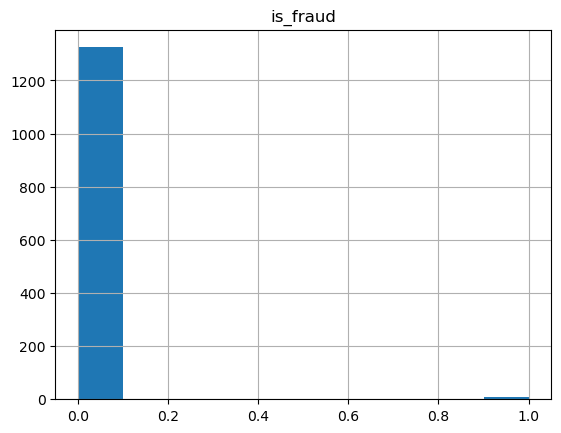

In [39]:
df.hist(column='is_fraud')

## DANS QUEL ETAT IL Y'A EU DES ACHATS AVEC LES CARTES ?

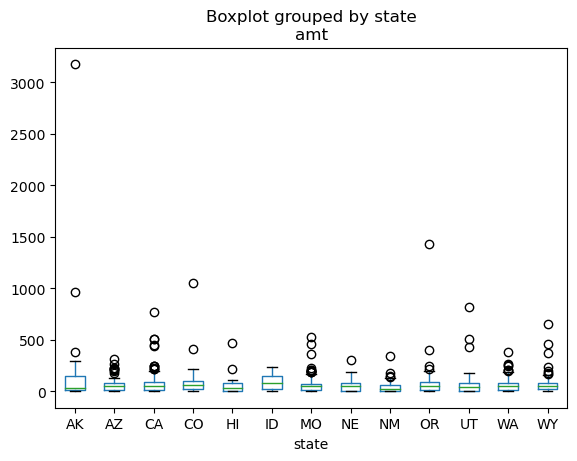

In [40]:
df.boxplot(by='state', column=['amt'], grid=False);

## RECUPERATION DES MONTANTS DEPENSEZ DANS LA VARIABLE "montant"

In [41]:
montant = df['amt']
montant

0       107.23
1       220.11
2        96.29
3         7.77
4         6.85
         ...  
1328     61.04
1329      1.54
1330     10.59
1331     31.27
1332     70.00
Name: amt, Length: 1333, dtype: float64

## VISUALISATION DU MONTANT DE TRANSACTION LE PLUS HAUT

In [42]:
montant.max()

3178.51

## VISUALISATION DU MONTANT DE TRANSACTION LE PLUS BAS

In [43]:
montant.min()

1.05

## RECUPERATION DES AGES DES PROPRIETAIRES DES CARTES BANCAIRES DANS LA VARIABLE "age"

In [44]:
age=df['dob']

## VISUALISATION DE L'AGE DU PLUS VIEUX A EFFECTUE UNE TRANSACTION AVEC SA CARTE

In [45]:
age.min()

'1927-09-09'

## VISUALISATION DE L'AGE DU PLUS JEUNE A EFFECTUE UNE TRANSACTION AVEC SA CARTE

In [46]:
age.max()

'2001-07-26'

## IMPORTATION DE LA BIBLIOTHEQUE SQLITE3 ET CREATION D'UNE TABLE CARTES POUR FAIRE DES REQUETES DESSUS

In [47]:
import sqlite3
connection = sqlite3.connect('db.sqlite')
cursor = connection.cursor()
cursor.execute
('Create Table if not exists CARTES (trans_date_trans_time Text,merchant Text,category Text,amt Float,city Text,state Text,lat Float,long Float,city_pop Integer,job Text,dob Text,trans_num Integer,merch_lat Float,merch_long Float,is_fraud Integer')
connection.commit()


## CONNEXION A LA TABLE CARTES AVEC LA CREATION OU LE REMPLACEMENT DE LA TABLE SI ELLE EXISTE

In [48]:
df.to_sql('CARTES', connection, if_exists='replace', index = True)
connection.close()

## Affichage des cartes ou il ya des fraudes

In [49]:

connection = sqlite3.connect('db.sqlite')
df1 = pd.read_sql_query("SELECT * FROM CARTES WHERE is_fraud=1", connection)
df1


,index,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,945,2019-01-04 00:58:03,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,1077,2019-01-04 15:06:38,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,1184,2019-01-04 22:37:04,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,1192,2019-01-04 23:06:28,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,1202,2019-01-04 23:59:09,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,1236,2019-01-05 03:15:35,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,1239,2019-01-05 03:21:29,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,1322,2019-01-05 11:31:23,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,1954-07-14,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1


## CAS SUR LES FRAUDES

* Quel temps les fraudes ont été effectué ?
* Quel job font les titulaires des cartes où il y'a eu des fraudes ? 

In [26]:
connection = sqlite3.connect('db.sqlite')
df1 = pd.read_sql_query("SELECT trans_date_trans_time,job FROM CARTES WHERE is_fraud=1", connection)
df1

,trans_date_trans_time,job
0,2019-01-04 00:58:03,"""Administrator, education"""
1,2019-01-04 15:06:38,"""Administrator, education"""
2,2019-01-04 22:37:04,"""Administrator, education"""
3,2019-01-04 23:06:28,"""Administrator, education"""
4,2019-01-04 23:59:09,"""Administrator, education"""
5,2019-01-05 03:15:35,"""Administrator, education"""
6,2019-01-05 03:21:29,"""Administrator, education"""
7,2019-01-05 11:31:23,Cytogeneticist


## VISUALISONS LA VILLE,LE NOMBRE DE POPULATION,LA LATITUDE ET LA LONGITUDE DU LIEU D'ACHAT ET DU MARCHANT

In [27]:
connection = sqlite3.connect('db.sqlite')
df1 = pd.read_sql_query("SELECT city,city_pop,lat,long,merch_lat,merch_long FROM CARTES WHERE is_fraud=1", connection)
df1

,city,city_pop,lat,long,merch_lat,merch_long
0,Wales,145,64.7556,-165.6723,65.654142,-164.722603
1,Wales,145,64.7556,-165.6723,65.468863,-165.473127
2,Wales,145,64.7556,-165.6723,65.347667,-165.914542
3,Wales,145,64.7556,-165.6723,64.445035,-166.080207
4,Wales,145,64.7556,-165.6723,65.447094,-165.446843
5,Wales,145,64.7556,-165.6723,64.088838,-165.104078
6,Wales,145,64.7556,-165.6723,63.917785,-165.827621
7,Browning,602,40.0290,-93.1607,39.167065,-93.705245


## VISUALISATION DES 5 PREMIERES LIGNES SUR LE MAKDOWN 

In [9]:
print(df.head().to_markdown())

|    | trans_date_trans_time   | merchant                    | category      |    amt | city                     | state   |     lat |     long |   city_pop | job                               | dob        | trans_num                        |   merch_lat |   merch_long |   is_fraud |
|---:|:------------------------|:----------------------------|:--------------|-------:|:-------------------------|:--------|--------:|---------:|-----------:|:----------------------------------|:-----------|:---------------------------------|------------:|-------------:|-----------:|
|  0 | 2019-01-01 00:00:44     | "Heller, Gutmann and Zieme" | grocery_pos   | 107.23 | Orient                   | WA      | 48.8878 | -118.21  |        149 | Special educational needs teacher | 1978-06-21 | 1f76529f8574734946361c461b024d99 |     49.159  |     -118.186 |          0 |
|  1 | 2019-01-01 00:00:51     | Lind-Buckridge              | entertainment | 220.11 | Malad City               | ID      | 42.1808 | -112.262 |